In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
model_rfc = RandomForestClassifier(random_state=0)
model_abc = AdaBoostClassifier(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
import matplotlib.pyplot as plt
Scoring = []
label = ['AB Before Tuning', 'AB After Tuning', 'Difference',
         'GB Before Tuning', 'GB After Tuning', 'Difference',
         'RF Before Tuning', 'RF After Tuning', 'Difference',
        ]
import time
import pickle
import joblib

In [2]:
Training = pd.read_csv('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Training.csv')
Training

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50,Label
0,1,-0.3299,0.108834,39.5003,65.228653,21,24,53,32,21,...,2.078850,23.122212,7.980207,12.598607,3660.0,50.0,4.455,174.0,8.200659,1
1,1,-1.1845,1.403040,56.3007,67.606411,15,17,59,32,27,...,2.078850,23.515914,7.980207,12.992309,3660.0,50.0,3.761,174.0,7.585027,1
2,1,0.0239,0.000571,40.3193,66.479653,21,24,56,35,21,...,2.061687,27.759960,7.980217,12.622195,4707.0,56.0,5.473,192.0,8.356547,1
3,1,-0.4296,0.184556,42.6228,76.076204,22,24,63,35,28,...,2.073639,13.576254,7.383352,6.192902,4488.0,56.0,9.798,186.0,7.638272,1
4,1,-0.6399,0.409472,59.7313,78.211790,18,19,66,36,30,...,2.067160,16.538268,9.962622,6.575646,4746.0,59.0,8.900,192.0,5.778325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,-1.0395,1.080560,40.0833,65.908653,21,24,54,33,21,...,2.077272,23.077169,7.980215,15.096953,4007.0,52.0,3.707,178.0,7.017729,0
156,1,-0.7613,0.579578,43.3476,68.575825,21,24,58,33,25,...,2.076737,23.618312,7.947877,15.670436,4051.0,50.0,4.322,178.0,7.419075,1
157,1,-0.9778,0.956093,65.8072,85.634169,21,23,73,40,33,...,2.085108,23.314449,13.567397,9.747052,6854.0,66.0,7.504,216.0,8.004365,1
158,1,-0.4468,0.199630,33.7560,59.041481,21,24,47,30,17,...,2.067135,22.964834,7.836884,12.584556,3071.0,45.0,3.576,166.0,7.522879,1


In [3]:
y_train = Training['Label']
X_train = Training.drop(['Label'], axis=1)

In [4]:
best_feature_rfc = pd.read_pickle('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Best Feature Random Forest.pickle')
best_feature_abc = pd.read_pickle('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Best Feature Ada Boost.pickle')
best_feature_gbc = pd.read_pickle('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Best Feature Gradient Boosting.pickle')

In [5]:
best_feature_rfc = np.array(best_feature_rfc[0])
best_feature_abc = np.array(best_feature_abc[0])
best_feature_gbc = np.array(best_feature_gbc[0])

In [6]:
X_train_rfc = X_train[best_feature_rfc]
X_train_abc = X_train[best_feature_abc]
X_train_gbc = X_train[best_feature_gbc]

In [7]:
X_train_rfc

,ALogP,apol,naAromAtom,nHeavyAtom,nO,ATS0m,ATS1m,ATS5m,ATS6m,ATS7m,...,SpDiam_D,SpAD_D,EE_D,VE3_D,VR2_D,VR3_D,SRW7,WTPT-4,WPOL,XLogP
0,-0.3299,65.228653,21,32,3,6293.066947,6118.706025,7124.505539,6190.469522,5960.268933,...,374.428566,475.319375,237.659687,-7.163258,14.824290,19.718409,4.727388,7.980207,50.0,4.455
1,-1.1845,67.606411,15,32,3,5403.400155,6017.722380,6915.001917,6303.804703,5831.120571,...,374.428566,475.319375,237.659687,-7.163258,14.824290,19.718409,4.727388,7.980207,50.0,3.761
2,0.0239,66.479653,21,35,3,6263.446540,6521.749659,8055.022172,7368.218544,6139.237909,...,440.025899,559.136230,279.568115,-6.969531,30.106685,24.360334,4.727388,7.980217,56.0,5.473
3,-0.4296,76.076204,22,35,3,5516.669523,6210.926483,8639.388088,7286.929402,7038.320606,...,413.524068,535.533866,267.766933,-6.700338,12.436041,21.265814,0.000000,7.383352,56.0,9.798
4,-0.6399,78.211790,18,36,4,5774.669652,6451.278604,9291.930675,8242.145182,7729.029369,...,422.400607,550.989531,275.494765,-6.056607,12.379267,21.958351,0.000000,9.962622,59.0,8.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-1.0395,65.908653,21,33,3,5376.824617,6005.418273,6893.222819,6249.751307,5579.574408,...,397.236150,505.195766,252.597883,-7.412201,12.435137,19.856211,4.727388,7.980215,52.0,3.707
156,-0.7613,68.575825,21,33,3,5380.888873,6077.820581,7236.519904,6215.555506,5761.682976,...,402.068472,510.905303,255.452651,-6.839159,13.896095,20.222781,4.727388,7.947877,50.0,4.322
157,-0.9778,85.634169,21,40,5,6518.410136,7400.567989,9337.611735,8386.981478,7992.428989,...,555.395106,713.689496,356.844748,-11.390232,21.700367,27.064835,4.844187,13.567397,66.0,7.504
158,-0.4468,59.041481,21,30,3,6000.474449,5781.749431,6578.749188,5619.968136,5864.895688,...,334.635488,426.217290,213.108645,-5.431094,12.069740,17.675697,6.137727,7.836884,45.0,3.576


# Ada Boost Classifier

In [8]:
score_abc1 = cross_val_score(model_abc, X_train_abc, y_train, cv=10, scoring='accuracy')
score_abc1 = np.average(score_abc1)
Scoring.append(score_abc1)
score_abc1

0.7125

In [9]:
# start = time.time()
# param_grid_abc = {
#     'random_state': [0],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'n_estimators': [50, 100, 150, 200, 250]
# }
# grid = GridSearchCV(estimator = model_abc, param_grid=param_grid_abc, cv=10, refit=True, verbose=2)
# grid.fit(X_train_abc,y_train)
# best_model_abc = grid.best_estimator_
# best_model_abc
# end = time.time()
# print("\n\n ----------------------------------------------------------------------------------------")
# print("time =" ,((end - start)%60), " Menit")
# print("\n\n ----------------------------------------------------------------------------------------")

In [10]:
# best_model_abc.to_pickle('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Ada_best.pickle')

In [11]:
# import joblib
# joblib.dump(best_model_abc, '/Users/irfanularifa/Documents/TA_FIX/0. Dataset/AB_best.pickle')

In [12]:
AB_Tuning = joblib.load('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/AB_best.pickle')

In [13]:
AB_Tuning

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=0)

In [14]:
model_abc = AB_Tuning
score_abc2 = cross_val_score(model_abc, X_train_abc, y_train, cv=10, scoring='accuracy')
score_abc2 = np.average(score_abc2)
Scoring.append(score_abc2)
score_abc2
Scoring.append((score_abc2-score_abc1))

# Gradient Boosting Classifier

In [15]:
score_gbc1 = cross_val_score(model_gbc, X_train_gbc, y_train, cv=10, scoring='accuracy')
score_gbc1 = np.average(score_gbc1)
Scoring.append(score_gbc1)
score_gbc1

0.71875

In [16]:
# start = time.time()
# param_grid_gbc = {
#     'random_state' : [0],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500],
#     'max_leaf_nodes': [2, 5, 10, 20, 50, 100]
# }
# grid = GridSearchCV(estimator = model_gbc, param_grid=param_grid_gbc, cv=10, refit=True, verbose=2)
# grid.fit(X_train_gbc,y_train)
# best_model_gbc = grid.best_estimator_
# best_model_gbc
# end = time.time()
# print("\n\n ----------------------------------------------------------------------------------------")
# print("time =" ,((end - start)%60), " Menit")
# print("\n\n ----------------------------------------------------------------------------------------")

In [17]:
# best_model_gbc

In [18]:
# import joblib
# joblib.dump(best_model_gbc, '/Users/irfanularifa/Documents/TA_FIX/0. Dataset/GB_best.pickle')

In [19]:
GB_Tuning = joblib.load('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/GB_best.pickle')

In [20]:
# Tuning = GradientBoostingClassifier(learning_rate=1.0, max_leaf_nodes=10,
#                            n_estimators=20, random_state=0)

In [21]:
model_gbc = GB_Tuning
score_gbc2 = cross_val_score(model_gbc, X_train_gbc, y_train, cv=10, scoring='accuracy')
score_gbc2 = np.average(score_gbc2)
Scoring.append(score_gbc2)
score_gbc2
Scoring.append((score_gbc2-score_gbc1))

# Random Forest Classifier

In [22]:
score_rfc1 = cross_val_score(model_rfc, X_train_rfc, y_train, cv=10, scoring='accuracy')
score_rfc1 = np.average(score_rfc1)
Scoring.append(score_rfc1)
score_rfc1

0.7625

In [23]:
# start = time.time()
# param_grid_rfc = {
#     'random_state' : [0],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [1, 2, 3],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'min_samples_split': [2, 4, 8, 10, 12],
#     'n_estimators': [100, 200, 300, 400, 500]
# }
# grid = GridSearchCV(estimator = model_rfc, param_grid=param_grid_rfc, cv=10, refit=True, verbose=2)
# grid.fit(X_train_rfc,y_train)
# best_model_rfc = grid.best_estimator_
# best_model_rfc
# end = time.time()
# print("\n\n ----------------------------------------------------------------------------------------")
# print("time =" ,((end - start)%60), " Menit")
# print("\n\n ----------------------------------------------------------------------------------------")

In [24]:
# best_model_rfc

In [25]:
# import joblib
# joblib.dump(best_model_rfc, '/Users/irfanularifa/Documents/TA_FIX/0. Dataset/RF_best.pickle')

In [26]:
RF_Tuning = joblib.load('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/RF_best.pickle')

In [27]:
# Tuning = RandomForestClassifier(max_depth=80, max_features=1, min_samples_split=4,
#                        random_state=0)

In [28]:
model_rfc = RF_Tuning
score_rfc2 = cross_val_score(model_rfc, X_train_rfc, y_train, cv=10, scoring='accuracy')
score_rfc2 = np.average(score_rfc2)
Scoring.append(score_rfc2)
score_rfc2
Scoring.append((score_rfc2-score_rfc1))

In [53]:
Scoring

[0.7125,
 0.76875,
 0.05625000000000002,
 0.71875,
 0.78125,
 0.0625,
 0.7625,
 0.7875,
 0.025000000000000022]

In [54]:
Score = [0.7125,
 0.76875,
 0.05625,
 0.71875,
 0.78125,
 0.06250,
 0.76250,
 0.78750,
 0.02500]

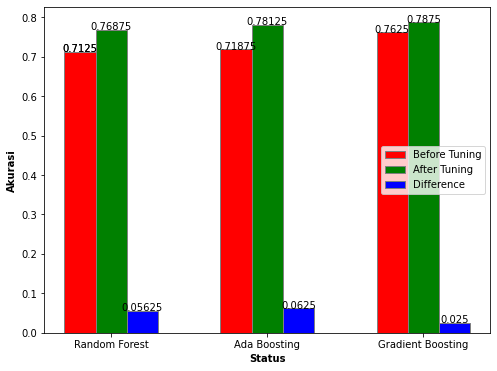

In [69]:
import matplotlib.pyplot as plt

def add_value_label(x_list,y_list,y_list2,y_list3):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")
        plt.text(i-0.8,y_list2[i-1],y_list2[i-1], ha="center")
        plt.text(i-0.6,y_list3[i-1],y_list3[i-1], ha="center")
        
plt.rcParams["figure.figsize"] = [8, 6]
column_name = {'status': label,
               'akurasi': Score}
hasil = pd.DataFrame(data=column_name)
hasil = hasil['akurasi']
BeforeTuning = [hasil[0],hasil[3],hasil[6]]
AfterTuning = [hasil[1],hasil[4],hasil[7]]
Difference = [hasil[2],hasil[5],hasil[8]]

barWidth = 0.2
br1 = np.arange(len(BeforeTuning))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


add_value_label(br1,BeforeTuning, AfterTuning, Difference)
plt.text(0,BeforeTuning[0],BeforeTuning[0],ha='center')

plt.bar(br1, BeforeTuning, color ='r', width = barWidth,
        edgecolor ='grey', label ='Before Tuning')
plt.bar(br2, AfterTuning, color ='g', width = barWidth,
        edgecolor ='grey', label ='After Tuning')
plt.bar(br3, Difference, color ='b', width = barWidth,
        edgecolor ='grey', label ='Difference')
plt.xlabel('Status', fontweight ='bold')
plt.ylabel('Akurasi', fontweight ='bold')
plt.xticks([r + barWidth for r in range(len(BeforeTuning))],
        ['Random Forest', 'Ada Boosting', 'Gradient Boosting'])
plt.legend(loc=7)
plt.show()